# Conway's Game of Life
- https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
- https://www.youtube.com/watch?v=C2vgICfQawE

In [ ]:
# Import required libraries

%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import display, clear_output
import numpy as np

In [ ]:
class Environment():

    def plot_grid(self):
        fig, ax = plt.subplots(figsize=(9, 9))
        ax.imshow(self.grid * 255, cmap=colors.ListedColormap(['navy', 'orange']))
        plt.show()

    def next_step(self):
        next_step_grid = np.zeros(self.grid.shape)
        
        # Loop through all cells storing necessary changes into next_step_grid
        for x in range(1, self.grid.shape[0]-1):
            for y in range(1, self.grid.shape[1]-1):
                # check cell status and count neighbors
                live_neighbors = self.grid[x-1:x+2, y-1:y+2].sum()
                if self.grid[x, y] == 1: live_neighbors -= 1  # Remove count of current/middle pixel
                # apply rules
                # Any live cell with fewer than two live neighbours dies, as if by underpopulation.
                if self.grid[x, y] == 1 and live_neighbors < 2:
                    next_step_grid[x, y] = 0
                # Any live cell with two or three live neighbours lives on to the next generation.
                elif self.grid[x, y] == 1 and (live_neighbors == 2 or live_neighbors == 3):
                    next_step_grid[x, y] = 1
                # Any live cell with more than three live neighbours dies, as if by overpopulation.
                elif self.grid[x, y] == 1 and live_neighbors > 3:
                    next_step_grid[x, y] = 0
                # Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
                elif self.grid[x, y] == 0 and live_neighbors == 3:
                    next_step_grid[x, y] = 1
                # Rest of dead cells remain dead.
                elif self.grid[x, y] == 0 and live_neighbors != 3:
                    next_step_grid[x, y] = 0

        return next_step_grid
    
    def let_er_rip(self, steps: int):
        for step in range(steps):
            next_step_grid = self.next_step()
            if np.array_equal(self.grid, next_step_grid):
                break  # If no changes, stop iterating
            else:
                self.grid = next_step_grid
            clear_output(wait=True)
            print("Step:", str(step+1))
            self.plot_grid()


class Seeded_Environment(Environment):

    def __init__(self, dims: tuple, start_coord: tuple, seed: np.ndarray):
        self.grid = np.zeros(dims)
        end_coord = tuple(map(sum, zip(start_coord, seed.shape)))
        self.grid[start_coord[0]:end_coord[0], start_coord[1]:end_coord[1]] = seed


class Random_Environment(Environment):

    def __init__(self, dims: tuple, true_p: float):
        self.grid = np.random.choice(a=[1, 0], size=dims, p=[true_p, 1-true_p])

Step: 379


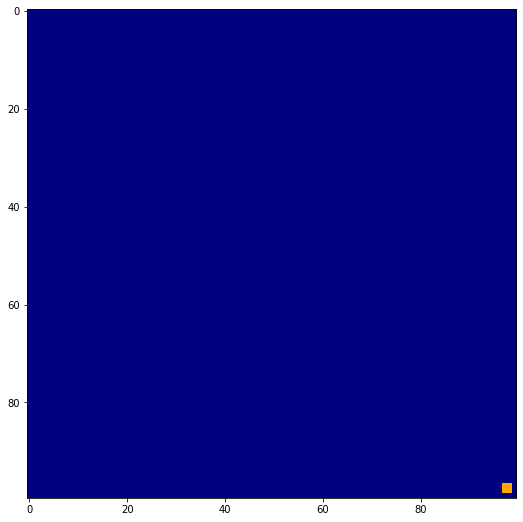

In [ ]:
seed = np.array([[0, 0, 1],
                 [1, 0, 1],
                 [0, 1, 1]])

seed_env = Seeded_Environment((100,100), (2, 2), seed)
seed_env.let_er_rip(1000)

Step: 1000


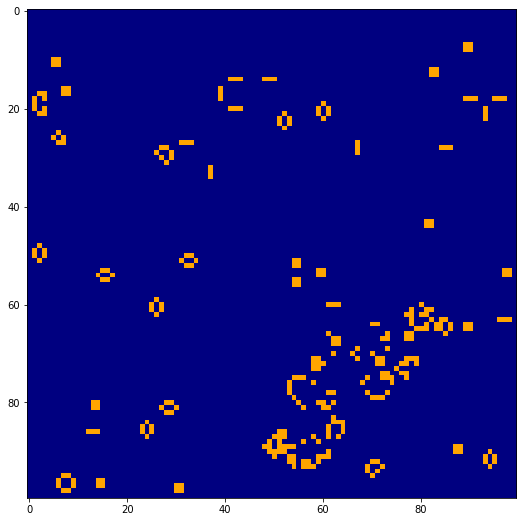

In [ ]:
rnd_env = Random_Environment((100,100), 0.1)
rnd_env.let_er_rip(1000)

### Possible improvements
- Check boundary conditions; they are special cases not given required attention here.